In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
##importing the data
df = pd.read_csv("dash.csv")
df.head()

Unnamed: 0  age        job  marital    education  default housing loan  \
0           0   56  housemaid  married     basic.4y       no      no   no   
1           1   57   services  married  high.school  unknown      no   no   
2           2   37   services  married  high.school       no     yes   no   
3           3   40     admin.  married     basic.6y       no      no   no   
4           4   56   services  married  high.school       no      no  yes   

     contact month  ... campaign  pdays  previous     poutcome  emp.var.rate  \
0  telephone   may  ...        1    999         0  nonexistent           1.1   
1  telephone   may  ...        1    999         0  nonexistent           1.1   
2  telephone   may  ...        1    999         0  nonexistent           1.1   
3  telephone   may  ...        1    999         0  nonexistent           1.1   
4  telephone   may  ...        1    999         0  nonexistent           1.1   

  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0         93.994          -36.4      4.857       5191.0  no  
1         93.994          -36.4      4.857       5191.0  no  
2         93.994          -36.4      4.857       5191.0  no  
3         93.994          -36.4      4.857       5191.0  no  
4         93.994          -36.4      4.857       5191.0  no  

[5 rows x 22 columns]

In [3]:
#checking the data types
df.dtypes

Unnamed: 0          int64
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [4]:
df.drop(columns=["Unnamed: 0"], inplace=True)


In [5]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [6]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [7]:
df['education'].replace({'basic.4y':'basic','basic.6y':'basic','basic.9y':'basic','unknown':'illiterate'},inplace=True)

In [8]:
df['education'].value_counts()

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
illiterate              1749
Name: education, dtype: int64

In [9]:
df['job'].replace({'self-employed':'entrepreneur','unknown':'unemployed'},inplace=True)

In [10]:
df['job'].value_counts()

admin.          10422
blue-collar      9254
technician       6743
services         3969
management       2924
entrepreneur     2877
retired          1720
unemployed       1344
housemaid        1060
student           875
Name: job, dtype: int64

## Binary Encoding


In [11]:
df['subscription']=np.where(df.y=='yes',1,0)
df=pd.get_dummies(df,columns=['job','marital','education','default','housing','loan','contact','month','day_of_week',
                             'poutcome'])
df=df.drop(['y'],axis=1)
##reorder colums
columns=[column for column in df.columns if column !='subscription']
columns=columns +['subscription']
df=df[columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  job_admin.                     41188 non-null  uint8  
 11  job_blue-collar                41188 non-null  uint8  
 12  job_entrepreneur               41188 non-null 

# Preprocessing

## One hot Encoding

Encoding all the categorical values using One Hot Encoding

In [12]:
##Preprocessing
from Data import one_hot_encoder

In [13]:
# df, cat_cols = one_hot_encoder(df, nan_as_category=True)


In [14]:
# df.dtypes

In [15]:
# df.head()

## Handling Outliers

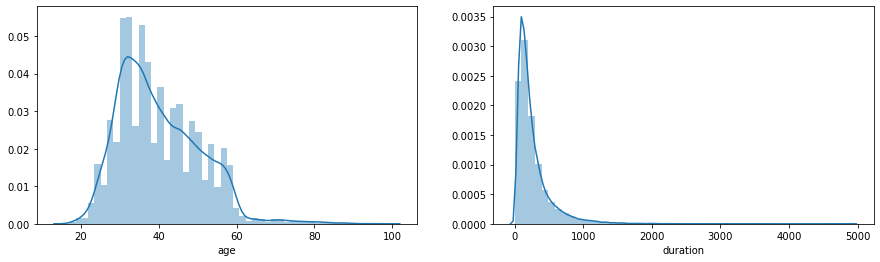

<Figure size 432x360 with 0 Axes>

In [16]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

plt.figure(figsize=(6,5))
sns.distplot(df["age"],ax=axis1)
sns.distplot(df["duration"],ax=axis2)

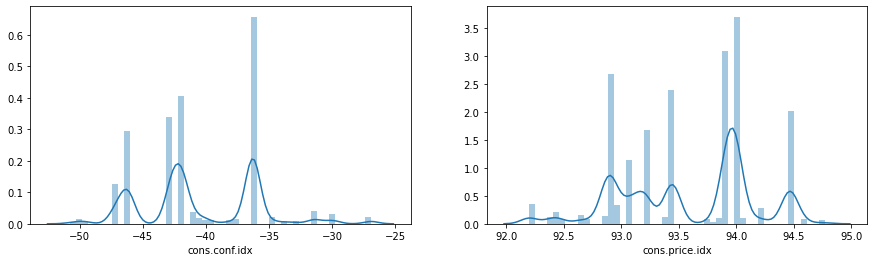

<Figure size 432x360 with 0 Axes>

In [17]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

plt.figure(figsize=(6,5))
sns.distplot(df["cons.conf.idx"],ax=axis1)
sns.distplot(df["cons.price.idx"],ax=axis2)

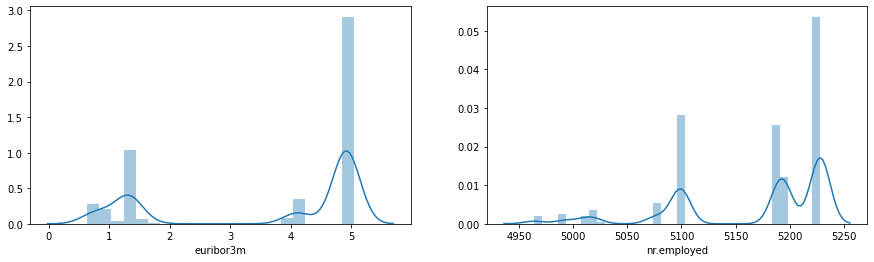

<Figure size 432x360 with 0 Axes>

In [18]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

plt.figure(figsize=(6,5))
sns.distplot(df["euribor3m"],ax=axis1)
sns.distplot(df["nr.employed"],ax=axis2)

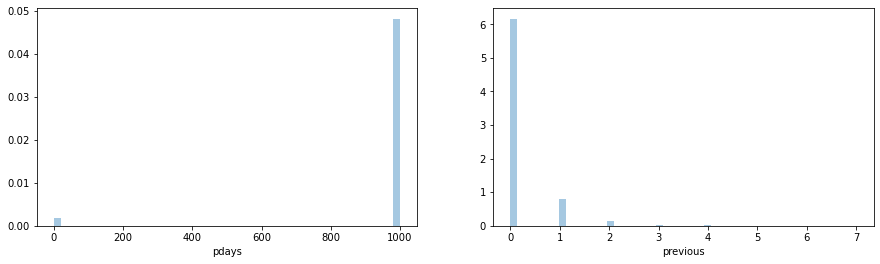

<Figure size 432x360 with 0 Axes>

In [19]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

plt.figure(figsize=(6,5))
sns.distplot(df["pdays"],ax=axis1)
sns.distplot(df["previous"],ax=axis2)

Capping outliers- age at 80 and duration at 2000,

In [20]:
df["age"]=df["age"].apply(lambda x: 80 if x>80 else x)
df["duration"]=df["duration"].apply(lambda y: 2000 if y>2000 else y)
print(max(df["age"]))
print(max(df["duration"]))

80
2000


## Rescaling using StandardScaler

In [21]:
#rescaling all numerical columns
from Data import scaler

In [22]:
df1=scaler(df)

In [23]:
df1["avg_age_conf_idx"] = df1.groupby('cons.conf.idx')["age"].transform('mean')


In [24]:
df1

age  duration  campaign     pdays  previous  emp.var.rate  \
0      1.543387  0.014306 -0.565922  0.195414 -0.349494      0.648092   
1      1.639907 -0.431642 -0.565922  0.195414 -0.349494      0.648092   
2     -0.290495 -0.125053 -0.565922  0.195414 -0.349494      0.648092   
3     -0.000935 -0.423679 -0.565922  0.195414 -0.349494      0.648092   
4      1.543387  0.197463 -0.565922  0.195414 -0.349494      0.648092   
...         ...       ...       ...       ...       ...           ...   
41183  3.184229  0.304968 -0.565922  0.195414 -0.349494     -0.752343   
41184  0.578186  0.500071 -0.565922  0.195414 -0.349494     -0.752343   
41185  1.543387 -0.272375 -0.204909  0.195414 -0.349494     -0.752343   
41186  0.385145  0.734990 -0.565922  0.195414 -0.349494     -0.752343   
41187  3.280749 -0.073291  0.156105  0.195414  1.671136     -0.752343   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  ...  \
0            0.722722       0.886447   0.712460     0.331680  ...   
1            0.722722       0.886447   0.712460     0.331680  ...   
2            0.722722       0.886447   0.712460     0.331680  ...   
3            0.722722       0.886447   0.712460     0.331680  ...   
4            0.722722       0.886447   0.712460     0.331680  ...   
...               ...            ...        ...          ...  ...   
41183        2.058168      -2.224953  -1.495186    -2.815697  ...   
41184        2.058168      -2.224953  -1.495186    -2.815697  ...   
41185        2.058168      -2.224953  -1.495186    -2.815697  ...   
41186        2.058168      -2.224953  -1.495186    -2.815697  ...   
41187        2.058168      -2.224953  -1.495186    -2.815697  ...   

       day_of_week_fri  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0            -0.484371         1.959000        -0.514581        -0.494394   
1            -0.484371         1.959000        -0.514581        -0.494394   
2            -0.484371         1.959000        -0.514581        -0.494394   
3            -0.484371         1.959000        -0.514581        -0.494394   
4            -0.484371         1.959000        -0.514581        -0.494394   
...                ...              ...              ...              ...   
41183         2.064533        -0.510465        -0.514581        -0.494394   
41184         2.064533        -0.510465        -0.514581        -0.494394   
41185         2.064533        -0.510465        -0.514581        -0.494394   
41186         2.064533        -0.510465        -0.514581        -0.494394   
41187         2.064533        -0.510465        -0.514581        -0.494394   

       day_of_week_wed  poutcome_failure  poutcome_nonexistent  \
0            -0.496067         -0.339290              0.397706   
1            -0.496067         -0.339290              0.397706   
2            -0.496067         -0.339290              0.397706   
3            -0.496067         -0.339290              0.397706   
4            -0.496067         -0.339290              0.397706   
...                ...               ...                   ...   
41183        -0.496067         -0.339290              0.397706   
41184        -0.496067         -0.339290              0.397706   
41185        -0.496067         -0.339290              0.397706   
41186        -0.496067         -0.339290              0.397706   
41187        -0.496067          2.947327             -2.514421   

       poutcome_success  subscription  avg_age_conf_idx  
0               -0.1857     -0.356309          0.030683  
1               -0.1857     -0.356309          0.030683  
2               -0.1857     -0.356309          0.030683  
3               -0.1857     -0.356309          0.030683  
4               -0.1857     -0.356309          0.030683  
...                 ...           ...               ...  
41183           -0.1857      2.806550          0.092569  
41184           -0.1857     -0.356309          0.092569  
41185           -0.1857     -0.356309          0.092569  
41186   

## PCA Dimensionality Reduction

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df1)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [26]:
principalDf

principal component 1  principal component 2
0                  -2.172246               2.189848
1                  -2.590012               2.309658
2                  -1.752538               0.431825
3                  -1.960870               1.081561
4                  -1.919959               0.976690
...                      ...                    ...
41183               2.307601               1.062926
41184               1.306618               0.817190
41185               1.898386               0.278264
41186               1.976466              -0.197238
41187               3.852245               2.127475

[41188 rows x 2 columns]

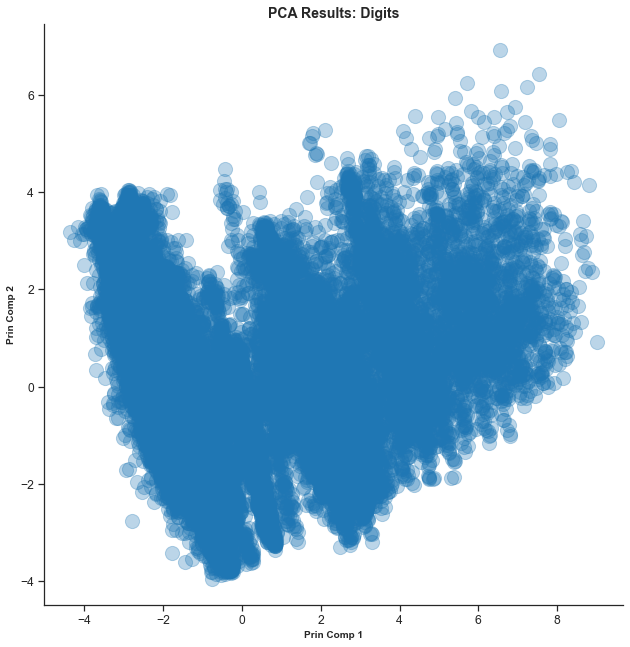

In [27]:
# Plot Digits PCA

# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='principal component 1',
           y='principal component 2',
           data=principalDf,
           fit_reg=False,
           legend=True,
           size=9,
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')

## TSNE

In [28]:
df1.shape

(41188, 60)

In [29]:
data_X = df1.head(77)
# y = digits.target[:600]

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [30]:
tsne_obj= tsne.fit_transform(data_X)

In [31]:
tsne_obj

array([[ 3.16311340e+01, -1.68404980e+01],
       [-2.80768299e+01, -1.10130739e+01],
       [ 1.18717880e+01,  2.40932446e+01],
       [-2.56828260e+00,  1.23540611e+01],
       [ 1.43509474e+01,  1.35427160e+01],
       [-2.31140041e+01, -1.16884642e+01],
       [-8.58821678e+00,  2.02847939e+01],
       [-3.00039825e+01,  2.72527237e+01],
       [ 2.72276173e+01,  8.36066341e+00],
       [ 1.81131725e+01,  2.51641750e+01],
       [-2.68943062e+01,  2.43868961e+01],
       [ 1.95131016e+01,  2.11326370e+01],
       [ 2.11952286e+01, -5.39585924e+00],
       [ 2.96435547e+01, -2.08467236e+01],
       [-2.93968821e+00, -7.06023741e+00],
       [ 1.22647772e+01, -2.55077667e+01],
       [ 1.33532357e+00, -5.84694242e+00],
       [ 1.06127901e+01, -1.90138130e+01],
       [ 1.21020842e+01, -1.19470272e+01],
       [-1.45179224e+01, -2.45131016e+01],
       [-6.94290400e-01,  2.99551048e+01],
       [-9.99979019e+00, -1.26650000e+01],
       [ 2.84315281e+01,  2.06625214e+01],
       [ 2.

In [32]:
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                        })

In [33]:
tsne_df.head()

X          Y
0  31.631134 -16.840498
1 -28.076830 -11.013074
2  11.871788  24.093245
3  -2.568283  12.354061
4  14.350947  13.542716

Text(0.5, 1.0, 'TSNE-Visualizing high dimensional data')

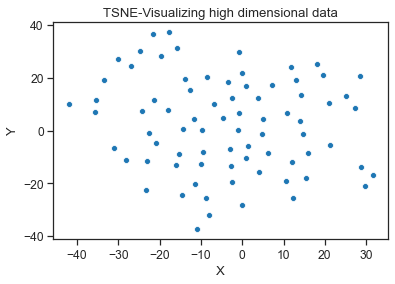

In [34]:
sns.scatterplot(x="X", y="Y",
              data=tsne_df);
plt.title("TSNE-Visualizing high dimensional data")

## Train Test Split

In [35]:
y=df.subscription
X=df.drop('subscription',axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)
X_train.head()

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
35049   23       523         2    999         0          -1.8          92.893   
18726   32       280         6    999         0           1.4          93.918   
1645    41        45         1    999         0           1.1          93.994   
31844   59        97         2    999         1          -1.8          92.893   
21236   35        29         1    999         0           1.4          93.444   

       cons.conf.idx  euribor3m  nr.employed  ...  month_oct  month_sep  \
35049          -46.2      1.250       5099.1  ...          0          0   
18726          -42.7      4.968       5228.1  ...          0          0   
1645           -36.4      4.855       5191.0  ...          0          0   
31844          -46.2      1.327       5099.1  ...          0          0   
21236          -36.1      4.963       5228.1  ...          0          0   

       day_of_week_fri  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
35049                1                0                0                0   
18726                0                0                1                0   
1645                 1                0                0                0   
31844                0                0                1                0   
21236                0                1                0                0   

       day_of_week_wed  poutcome_failure  poutcome_nonexistent  \
35049                0                 0                     1   
18726                0                 0                     1   
1645                 0                 0                     1   
31844                0                 1                     0   
21236                0                 0                     1   

       poutcome_success  
35049                 0  
18726                 0  
1645                  0  
31844                 0  
21236                 0  

[5 rows x 58 columns]

## k-Fold

In [36]:
from model import modelKfold

In [37]:
from sklearn.model_selection import KFold 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier

# import xgboost as xgb




In [52]:
# xGradient=xgb.XGBClassifier()
logReg=LogisticRegression()
mlp=MLPClassifier()
dectree=DecisionTreeClassifier()

# xGradientTrained,xgScores=modelKfold(xGradient, X_train_refined1,Y_train_refined1)
logRegTrained,lrScores=modelKfold(logReg, X_train,y_train,X_train)
mlpTrained,mlScores=modelKfold(mlp, X_train,y_train,X_train)
decTreeTrained,dtScores=modelKfold(dectree, X_train,y_train,X_train)


# print("xgboost scores")
# print('\n'.join('{}:{}'.format(*k)for k in enumerate(xgScores)))
print("Logistic regression scores")
print('\n'.join('{}:{}'.format(*k)for k in enumerate(lrScores)))
print("MLP Classifier scores")
print('\n'.join('{}:{}'.format(*k)for k in enumerate(mlScores)))
print("Decission Tree scores")
print('\n'.join('{}:{}'.format(*k)for k in enumerate(dtScores)))

Logistic regression scores
0:0.9101699487456164
1:0.9049096304289183
2:0.9105745886161316
3:0.9119233881845158
4:0.912046404964252
MLP Classifier scores
0:0.8941192338818451
1:0.9057189101699488
2:0.8987051524143512
3:0.9073374696520097
4:0.8226089302576555
Decission Tree scores
0:0.884947396816833
1:0.8911518748314
2:0.8854869166441867
3:0.887240356083086
4:0.8908673951166869


In [56]:
y_pred=logReg.predict(X_test)

In [57]:
df2 = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})


In [58]:
df2['Predicted'].value_counts()

0    3814
1     305
Name: Predicted, dtype: int64

In [59]:
y_pred_1=mlp.predict(X_test)

In [60]:
df3 = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred_1.flatten()})


In [61]:
df3['Predicted'].value_counts()

0    3016
1    1103
Name: Predicted, dtype: int64